In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


# import packages 

In [2]:
df1="C:\\Users\\admin\\OneDrive\\PRATIK\\NARESH IT\\DATA SCIENCE\\DATA SETS\\csv\\Visadataset.csv"
visa_df=pd.read_csv(df1)
visa_df

# read the data 

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


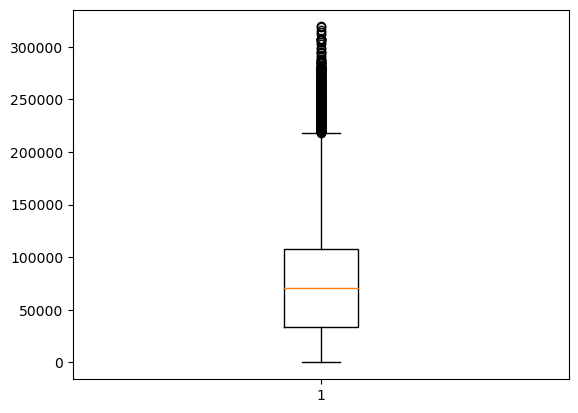

In [3]:
plt.boxplot(visa_df['prevailing_wage'])
plt.show()

In [4]:
- orange line : Median value = 50p data 
- black dots : all are outliers 

SyntaxError: invalid decimal literal (3526737535.py, line 1)

**pricedure to find the outlier**

$Step-1$:

   - Calculate Q1, Q2 & Q3
    
$Step-2$:

   - Calculate IQR = (Q3-Q1)
    
$Step-3$:

   - Calculate Upper Bound UB = Q3+1.5IQR
    
   - Calculate Lower Bound LB = Q1+1.5IQR
    
$Step-4$:

   - Find the outlier which are having greater than UB
    
   - Find the outlier which are having less than LB

## $step-1$

In [5]:

Q1=np.quantile(visa_df['prevailing_wage'],0.25)
Q2=np.quantile(visa_df['prevailing_wage'],0.5)
Q3=np.quantile(visa_df['prevailing_wage'],0.75)


## $step-2$

In [6]:
IQR = (Q3-Q1)
IQR

73720.03250000002

## $step-3$

In [7]:
UB = Q3 + 1.5*IQR
LB = Q1 - 1.5*IQR

UB,LB

(218315.56125000003, -76564.56875000002)

## $step-4$

In [8]:
# >UB  <LB    are the outlier

con1 = visa_df['prevailing_wage'] > UB
con2 = visa_df['prevailing_wage'] < LB


######### # if u apply '|'  with  outlier

outliers_df=visa_df[con1|con2]
outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [9]:
def outliers(col):
    Q1=np.quantile(visa_df[col],0.25)
    Q2=np.quantile(visa_df[col],0.5)
    Q3=np.quantile(visa_df[col],0.75)
    IQR = (Q3-Q1)
    UB = Q3 + 1.5*IQR
    LB = Q1 - 1.5*IQR
    con1 = visa_df[col] > UB
    con2 = visa_df[col] < LB
    outliers_df=visa_df[con1|con2]
    len(outliers_df)
    print(f'{col} has {len(outliers_df)} outliers' )
    
num_col= visa_df.select_dtypes(exclude='object').columns
for col in num_col:
    outliers(col)


no_of_employees has 1556 outliers
yr_of_estab has 3260 outliers
prevailing_wage has 427 outliers


In [10]:

Q1=np.quantile(visa_df['prevailing_wage'],0.25)
Q2=np.quantile(visa_df['prevailing_wage'],0.5)
Q3=np.quantile(visa_df['prevailing_wage'],0.75)
IQR = (Q3-Q1)
UB = Q3 + 1.5*IQR
LB = Q1 - 1.5*IQR
##################### Outliers df ##################
con1 = visa_df['prevailing_wage'] > UB
con2 = visa_df['prevailing_wage'] < LB
outliers_df=visa_df[con1|con2]

##################### Non outliers df ###########
con11 = visa_df['prevailing_wage'] < UB
con22 = visa_df['prevailing_wage'] > LB
non_outliers_df=visa_df[con11 & con22]



In [11]:
len(non_outliers_df),len(outliers_df)

(25053, 427)

In [12]:
len(non_outliers_df) + len(outliers_df)

25480

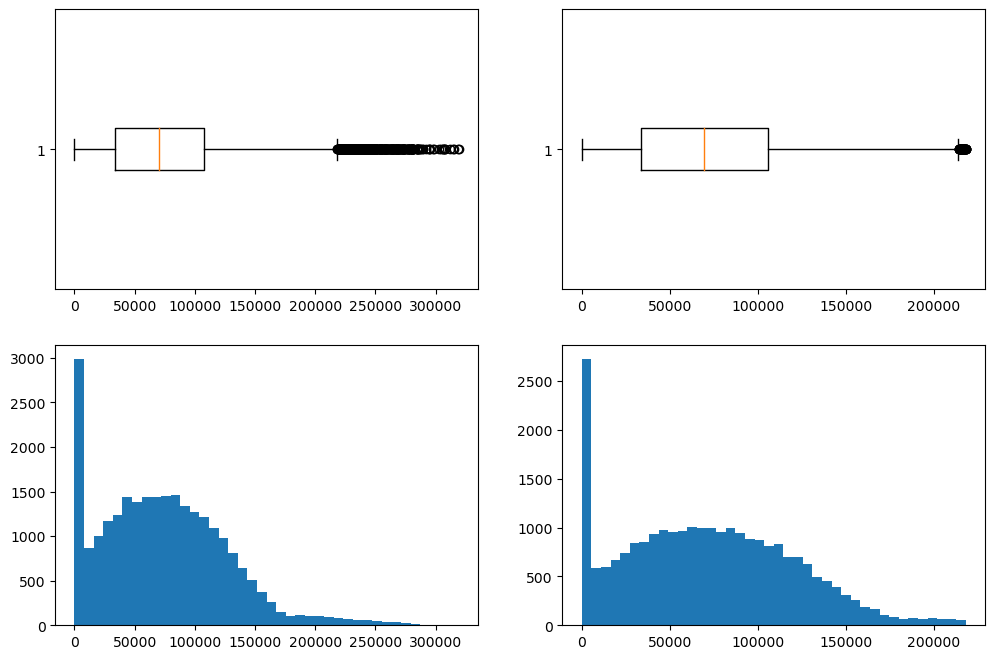

In [13]:
# will compare 
# Total data vs non outliers datav 
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.boxplot(visa_df['prevailing_wage'],vert=False)   # 25480
plt.subplot(2,2,2)
plt.boxplot(non_outliers_df['prevailing_wage'],vert=False) # 25053
plt.subplot(2,2,3)
plt.hist(visa_df['prevailing_wage'],bins=40)
plt.subplot(2,2,4)
plt.hist(non_outliers_df['prevailing_wage'],bins=40)
plt.show()

## How to Deal With Outliers 
- Drop the outliers based some percentage 
    - if you have very huge data 
    - and the outliers percentage is less than 2 percentages (<2) , then drop the columns 
    - Drop the outliers means , we are removing some rows all the columns
    - In the above examples total count = 25480 , outliers are = 427 , 427*100/25480=1.6
    - After removing 427 observations , we have 25053 observations (98% of the data )

- Impute (fill) the outliers with median value 
    - we already know that outliers doesnt affect the median value s
    - so if you dont want loss the data , and you want fill the outliers then use Median 

- Impute (fill) with the upper and lower bound (UB & LB ) values (capping)
    - fill the outliers with UB value , which are having >UB
    - fill the outliers with LB value , which are having <LB

In [14]:
# Fill the outliers 
# missing values 
# Bi variate multivariate 
# categorical to numerical
# standard
# transformation 
# feature selection 
# pca 

**Using Median Imputation and Concatnation and adatframe**

In [15]:
len(non_outliers_df),len(outliers_df)

(25053, 427)

In [19]:
visa_df[['prevailing_wage']].median()

prevailing_wage    70308.21
dtype: float64

In [23]:
# <median value > pf originbal data frame (visaa_df)

outliers_df['prevailing_wage']=visa_df['prevailing_wage'].median()
outliers_df['prevailing_wage']

C:\Users\admin\AppData\Local\Temp\ipykernel_4316\2184094678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['prevailing_wage']=visa_df['prevailing_wage'].median()


14       70308.21
34       70308.21
130      70308.21
216      70308.21
221      70308.21
           ...   
25191    70308.21
25195    70308.21
25468    70308.21
25469    70308.21
25476    70308.21
Name: prevailing_wage, Length: 427, dtype: float64

In [25]:

outliers_df['prevailing_wage']=visa_df['prevailing_wage'].median()
modified_data=outliers_df
modified_data

C:\Users\admin\AppData\Local\Temp\ipykernel_4316\2899554835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['prevailing_wage']=visa_df['prevailing_wage'].median()


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,70308.21,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,70308.21,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,70308.21,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,70308.21,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,70308.21,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,70308.21,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,70308.21,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,70308.21,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,70308.21,Year,N,Certified


In [32]:
#now we have non_outliers_df and modified data
# we need to merge , concatenate , combine
#outer join = A Union B
#inner join = A Intersection B
pd.merge(non_outliers_df,modified_data,how='outer')
final_df=pd.concat([non_outliers_df,modified_data])
final_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,70308.2100,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,70308.2100,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,70308.2100,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,70308.2100,Year,N,Certified


In [43]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


df1="C:\\Users\\admin\\OneDrive\\PRATIK\\NARESH IT\\DATA SCIENCE\\DATA SETS\\csv\\Visadataset.csv"
visa_df=pd.read_csv(df1)
visa_df

# read the data 


Q1=np.quantile(visa_df['prevailing_wage'],0.25)
Q2=np.quantile(visa_df['prevailing_wage'],0.5)
Q3=np.quantile(visa_df['prevailing_wage'],0.75)
IQR = (Q3-Q1)
UB = Q3 + 1.5*IQR
LB = Q1 - 1.5*IQR
##################### Outliers df ##################
con1 = visa_df['prevailing_wage'] > UB
con2 = visa_df['prevailing_wage'] < LB
outliers_df=visa_df[con1|con2]

##################### Non outliers df ###########
con11 = visa_df['prevailing_wage'] < UB
con22 = visa_df['prevailing_wage'] > LB
non_outliers_df=visa_df[con11 & con22]



####################################################################################
# <median value > pf originbal data frame (visaa_df)

outliers_df['prevailing_wage']=visa_df['prevailing_wage'].median()
outliers_df['prevailing_wage']

pd.merge(non_outliers_df,modified_data,how='outer')
final_df=pd.concat([non_outliers_df,modified_data])
final_df

C:\Users\admin\AppData\Local\Temp\ipykernel_4316\844476002.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['prevailing_wage']=visa_df['prevailing_wage'].median()


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,70308.2100,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,70308.2100,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,70308.2100,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,70308.2100,Year,N,Certified


{'whiskers': [<matplotlib.lines.Line2D at 0x12a9d38a110>,
 'caps': [<matplotlib.lines.Line2D at 0x12a9d388bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12a9b161390>],
 'medians': [<matplotlib.lines.Line2D at 0x12a9d383dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12a9354ead0>],
 'means': []}

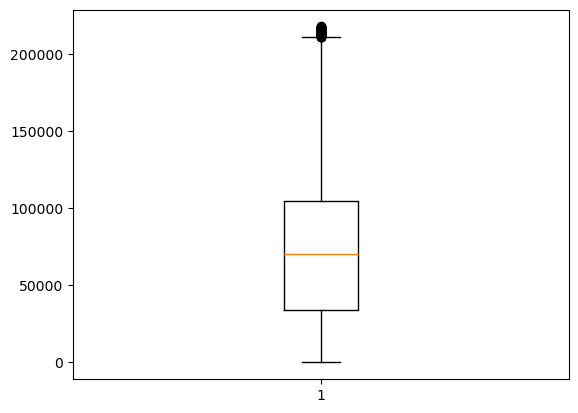

In [45]:
plt.boxplot(final_df['prevailing_wage'])

**np.where**

In [46]:
d1=pd.DataFrame()
d1['Name']=['Ramesh',"Suresh",'Sathish']
d1['Age']=[24,30,32]

# Inthe Age column > 25 i want replace 300
con=d1['Age']>25

# where the ever true : 300
# where ever the falis : keep it as

d1['Age']=np.where(con,300,d1['Age'])
d1

,Name,Age
0,Ramesh,24
1,Suresh,300
2,Sathish,300


In [47]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


df1="C:\\Users\\admin\\OneDrive\\PRATIK\\NARESH IT\\DATA SCIENCE\\DATA SETS\\csv\\Visadataset.csv"
visa_df=pd.read_csv(df1)
visa_df

# read the data 


Q1=np.quantile(visa_df['prevailing_wage'],0.25)
Q2=np.quantile(visa_df['prevailing_wage'],0.5)
Q3=np.quantile(visa_df['prevailing_wage'],0.75)
IQR = (Q3-Q1)
UB = Q3 + 1.5*IQR
LB = Q1 - 1.5*IQR
##################### Outliers df ##################
con1 = visa_df['prevailing_wage'] > UB
con2 = visa_df['prevailing_wage'] < LB
outliers_df=visa_df[con1|con2]

In [48]:
con=con1|con2
con

0        False
1        False
2        False
3        False
4        False
         ...  
25475    False
25476     True
25477    False
25478    False
25479    False
Name: prevailing_wage, Length: 25480, dtype: bool

{'whiskers': [<matplotlib.lines.Line2D at 0x12a9d439690>,
 'caps': [<matplotlib.lines.Line2D at 0x12a9caef290>,
 'boxes': [<matplotlib.lines.Line2D at 0x12a9d438650>],
 'medians': [<matplotlib.lines.Line2D at 0x12a9d38b190>],
 'fliers': [<matplotlib.lines.Line2D at 0x12a9d6bb250>],
 'means': []}

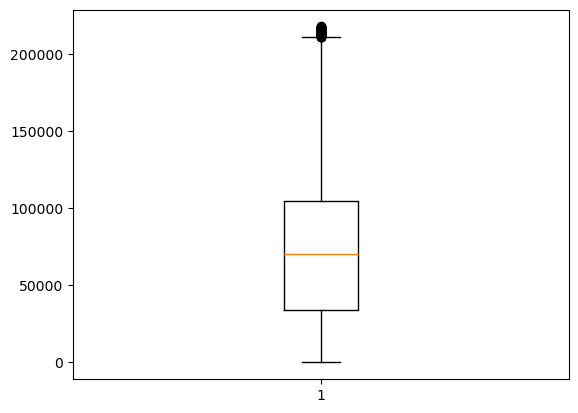

In [50]:
visa_df['prevailing_wage']=np.where(con,visa_df['prevailing_wage'].median(),visa_df['prevailing_wage'])
visa_df['prevailing_wage']
plt.boxplot(visa_df['prevailing_wage'])